/tmp/ipython-input-1957884529.py:270: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(start=start_ts, end=end_ts, freq=freq, inclusive="left")


,predictor,enabled,notes
0,temp_national_c,True,temp
1,oil_price_usd,True,macro
2,remittances_index,True,macro
3,population_index,True,macro
4,load_lag_24h_mw,True,lag
5,load_lag_168h_mw,True,lag
6,month_sin,True,calendar
7,month_cos,True,calendar
8,h_0,True,calendar
9,h_1,True,calendar


,count
notes,
calendar,33
lag,2
macro,3
temp,1


Mathematical model:
y(t) = b0 + b1*temp_national_c(t) + b2*oil_price_usd(t) + b3*remittances_index(t) + b4*population_index(t) + b5*load_lag_24h_mw(t) + b6*load_lag_168h_mw(t) + b7*month_sin(t) + b8*month_cos(t) + b9*h_0(t) + b10*h_1(t) + b11*h_2(t) + b12*h_3(t) + b13*h_4(t) + b14*h_5(t) + b15*h_6(t) + b16*h_7(t) + b17*h_8(t) + b18*h_9(t) + b19*h_10(t) + b20*h_11(t) + b21*h_12(t) + b22*h_13(t) + b23*h_14(t) + b24*h_15(t) + b25*h_16(t) + b26*h_17(t) + b27*h_18(t) + b28*h_19(t) + b29*h_20(t) + b30*h_21(t) + b31*h_22(t) + b32*h_23(t) + b33*dow_0(t) + b34*dow_1(t) + b35*dow_2(t) + b36*dow_3(t) + b37*dow_4(t) + b38*dow_5(t) + b39*dow_6(t) + e(t)

Independent predictors (x variables):
['temp_national_c', 'oil_price_usd', 'remittances_index', 'population_index', 'load_lag_24h_mw', 'load_lag_168h_mw', 'month_sin', 'month_cos', 'h_0', 'h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16'] ... (total: 39 )


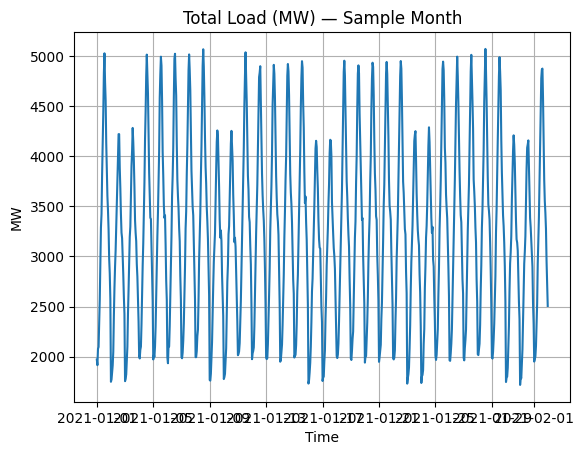

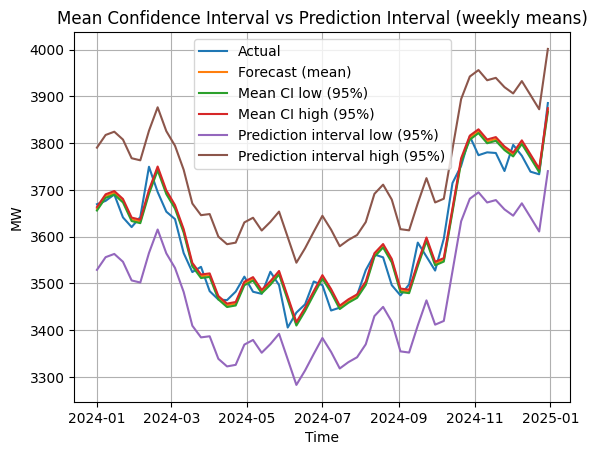


Regression coefficients (top 30 by |value|):
const              -2797.792620
population_index     560.614967
dow_5               -492.208731
dow_6               -448.840812
dow_2               -380.320692
dow_1               -380.017453
dow_4               -379.860947
dow_3               -379.820142
h_0                 -360.259391
h_1                 -356.641999
h_2                 -347.279974
dow_0               -336.723843
h_3                 -327.845717
h_4                 -293.116383
h_23                -259.721551
h_5                 -244.876037
h_22                -211.018682
h_6                 -189.721348
h_21                -165.468718
h_13                 152.746432
h_7                 -139.450008
h_14                 133.819329
h_20                -129.349627
h_12                 129.101866
h_19                -103.826373
h_8                  -95.618479
h_15                  81.278859
h_18                 -78.843627
h_11                  73.986659
h_9                  -49.3

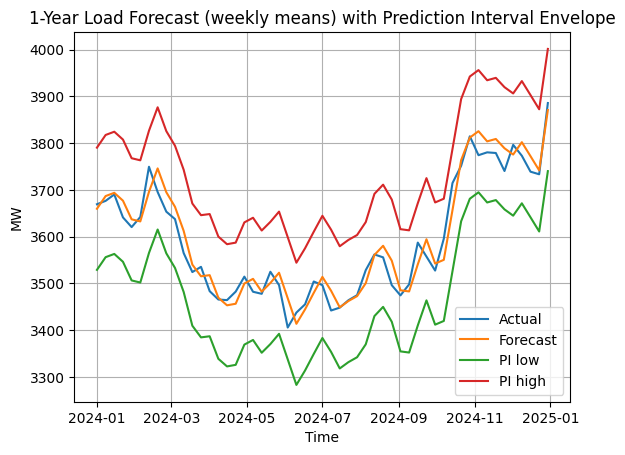

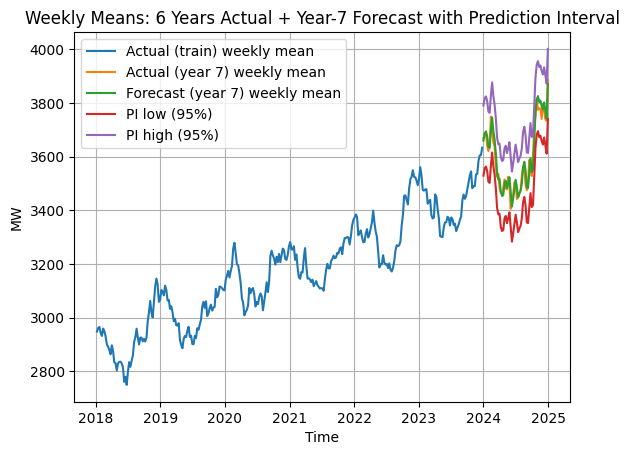


Done. CSV saved as: synthetic_ecuador_hourly_7y.csv


In [1]:
# Single-script / single-cell: Long-term Load Forecasting (Multiple Linear Regression) — Ecuador synthetic case

# --- Install dependencies (Colab-safe) ---
import sys, subprocess, textwrap
def _pip_install(pkg: str) -> None:
    subprocess.check_call([sys.executable, "-m", "pip", "-q", "install", pkg])

try:
    import statsmodels.api as sm
except Exception:
    _pip_install("statsmodels")
    import statsmodels.api as sm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# ===== Student Control Panel (single cell) =====
# if widgets don’t render, run !pip -q install ipywidgets once and re-run the cell
from ipywidgets import VBox, HBox, FloatSlider, IntSlider, Dropdown, SelectMultiple, Checkbox, Button, Output, Label
from IPython.display import display, clear_output

# ---- helper: safe display ----
out = Output()

# ---- CONFIG WIDGETS ----
w_years = IntSlider(value=7, min=5, max=10, step=1, description="Years", continuous_update=False)
w_seed = IntSlider(value=11, min=1, max=999, step=1, description="Seed", continuous_update=False)
w_peak = FloatSlider(value=5200.0, min=2000.0, max=9000.0, step=100.0, description="Peak MW", continuous_update=False)
w_pop = FloatSlider(value=0.035, min=0.0, max=0.08, step=0.005, description="Pop growth", continuous_update=False)

w_cool_sens = FloatSlider(value=0.018, min=0.0, max=0.05, step=0.002, description="Cool sens", continuous_update=False)
w_heat_pen = FloatSlider(value=0.15, min=0.0, max=0.5, step=0.05, description="Heater %", continuous_update=False)

w_forecast_start = Dropdown(
    options=[
        "2020-01-01 00:00:00",
        "2021-01-01 00:00:00",
        "2022-01-01 00:00:00",
        "2023-01-01 00:00:00",
        "2024-01-01 00:00:00",
    ],
    value="2024-01-01 00:00:00",
    description="Forecast start",
)

w_target = Dropdown(
    options=["load_total_mw", "load_res_mw", "load_com_mw", "load_ind_mw", "load_pub_mw"],
    value="load_total_mw",
    description="Target",
)

w_use_hour = Checkbox(value=True, description="Use hour dummies")
w_use_dow = Checkbox(value=True, description="Use DOW dummies")
w_use_lags = Checkbox(value=True, description="Use lagged load")
w_use_macro = Checkbox(value=True, description="Use macro (oil/remit/pop)")
w_use_temp = Checkbox(value=True, description="Use temperature")
w_use_month = Checkbox(value=True, description="Use month sin/cos")

btn_run = Button(description="Regenerate + Fit + Plot", button_style="success")
btn_show_pred = Button(description="Show predictor table", button_style="")
pred_out = Output()

# ---- REQUIRED FUNCTIONS must exist in your notebook already ----
# build_synthetic_dataset(...)
# train_and_forecast_one_year(...)  (the version that outputs mci_low/mci_high/pi_low/pi_high)
# format_model_equation(...)

def _build_predictors(df: pd.DataFrame) -> list[str]:
    predictors = []
    if w_use_temp.value:
        predictors += ["temp_national_c"]
    if w_use_macro.value:
        predictors += ["oil_price_usd", "remittances_index", "population_index"]
    if w_use_lags.value:
        predictors += ["load_lag_24h_mw", "load_lag_168h_mw"]
    if w_use_month.value:
        predictors += ["month_sin", "month_cos"]
    if w_use_hour.value:
        predictors += [c for c in df.columns if c.startswith("h_")]
    if w_use_dow.value:
        predictors += [c for c in df.columns if c.startswith("dow_")]
    return predictors

def _predictor_table(predictors: list[str]) -> pd.DataFrame:
    return pd.DataFrame(
        {
            "predictor": predictors,
            "type": [
                "temp" if "temp" in p else
                "macro" if p in ["oil_price_usd", "remittances_index", "population_index"] else
                "lag" if p.startswith("load_lag") else
                "calendar" if (p.startswith("h_") or p.startswith("dow_") or p in ["month_sin","month_cos"]) else
                ""
                for p in predictors
            ],
        }
    )

def _run_pipeline(_):
    with out:
        clear_output(wait=True)

        # 1) regenerate dataset
        df_local = build_synthetic_dataset(
            start="2018-01-01 00:00:00",
            years=int(w_years.value),
            seed=int(w_seed.value),
            national_peak_mw=float(w_peak.value),
            population_growth_annual=float(w_pop.value),
        )

        # apply student-chosen temperature parameters by scaling effects (simple teaching knob)
        # (we modify the already-generated temps rather than rewriting the generator)
        # - cooling sensitivity: increase impact by scaling temperature above threshold
        # - heater penetration: increase impact by scaling cold-degree-hours proxy
        coast_thr = 26.0
        high_thr = 14.0
        cool = np.maximum(0.0, df_local["temp_coast_c"].values - coast_thr)
        heat = np.maximum(0.0, high_thr - df_local["temp_highlands_c"].values)

        df_local["cooling_index"] = cool * float(w_cool_sens.value)
        df_local["heating_index"] = heat * float(w_heat_pen.value)

        # optionally let students include these as predictors via temp checkbox (kept separate)
        # (not included by default unless they manually add to predictors list)
        # ------------------------------------------------------------

        # 2) choose target + predictors
        target = w_target.value
        predictors = _build_predictors(df_local)

        print("Model form:")
        print(format_model_equation(predictors, target="y(t)"))
        print("\nTarget:", target)
        print("Predictors used:", len(predictors))

        # 3) plot sample month total/target load
        sample = df_local.loc["2021-01-01":"2021-02-01", target]
        plt.figure()
        plt.plot(sample.index, sample.values)
        plt.title(f"{target} — Sample Month")
        plt.xlabel("Time")
        plt.ylabel("MW")
        plt.grid(True)
        plt.show()

        # 4) forecast 1 year
        forecast_start = w_forecast_start.value
        model, fc = train_and_forecast_one_year(
            df=df_local,
            target=target,
            predictors=predictors,
            forecast_year_start=forecast_start,
            alpha=0.05,
        )

        # print coefficients (top by magnitude)
        print("\nTop coefficients (by |value|):")
        coef = model.params.sort_values(key=lambda s: np.abs(s), ascending=False)
        print(coef.head(20))

        # 5) Plot 6y weekly means + year forecast + PI
        train_end = pd.Timestamp(forecast_start)
        train_week = df_local.loc[df_local.index < train_end, target].resample("7D").mean()
        fc_week = fc.resample("7D").mean()

        plt.figure()
        plt.plot(train_week.index, train_week.values, label="Actual (train) weekly mean")
        plt.plot(fc_week.index, fc_week["y_true"], label="Actual (forecast year) weekly mean")
        plt.plot(fc_week.index, fc_week["y_pred"], label="Forecast (mean)")
        plt.plot(fc_week.index, fc_week["pi_low"], label="PI low (95%)")
        plt.plot(fc_week.index, fc_week["pi_high"], label="PI high (95%)")
        plt.title("Weekly Means: Train Actual + Forecast Year with Prediction Interval")
        plt.xlabel("Time")
        plt.ylabel("MW")
        plt.grid(True)
        plt.legend()
        plt.show()

        # 6) Plot Mean CI vs Prediction Interval
        plt.figure()
        plt.plot(fc_week.index, fc_week["y_true"], label="Actual")
        plt.plot(fc_week.index, fc_week["y_pred"], label="Forecast (mean)")
        plt.plot(fc_week.index, fc_week["mci_low"], label="Mean CI low (95%)")
        plt.plot(fc_week.index, fc_week["mci_high"], label="Mean CI high (95%)")
        plt.plot(fc_week.index, fc_week["pi_low"], label="Prediction interval low (95%)")
        plt.plot(fc_week.index, fc_week["pi_high"], label="Prediction interval high (95%)")
        plt.title("Mean Confidence Interval vs Prediction Interval (weekly means)")
        plt.xlabel("Time")
        plt.ylabel("MW")
        plt.grid(True)
        plt.legend()
        plt.show()

        # save for "predictor table" button
        _run_pipeline.last_predictors = predictors

_run_pipeline.last_predictors = []

def _show_predictors(_):
    with pred_out:
        clear_output(wait=True)
        if not _run_pipeline.last_predictors:
            print("Run the pipeline first.")
            return
        display(_predictor_table(_run_pipeline.last_predictors))

btn_run.on_click(_run_pipeline)
btn_show_pred.on_click(_show_predictors)

ui = VBox(
    [
        Label("Student Control Panel — adjust assumptions and predictors, then run"),
        HBox([w_years, w_seed, w_peak, w_pop]),
        HBox([w_cool_sens, w_heat_pen]),
        HBox([w_target, w_forecast_start]),
        HBox([w_use_temp, w_use_macro, w_use_lags, w_use_month, w_use_hour, w_use_dow]),
        HBox([btn_run, btn_show_pred]),
        out,
        pred_out,
    ]
)

display(ui)


# =========================
# 1) Synthetic data builder
# =========================

def format_model_equation(predictors: list[str], target: str = "y(t)") -> str:
    """
    Build a human-readable regression equation string.

    Inputs:
      predictors: list[str]
        Predictor (x) variable names used in the regression.
      target: str
        Name to display for the dependent variable (default "y(t)").

    Outputs:
      str
        Equation of the form: y(t) = b0 + b1*x1(t) + ... + bn*xn(t) + e(t)
    """
    terms = [f"b{i+1}*{name}(t)" for i, name in enumerate(predictors)]
    rhs = "b0" + (" + " + " + ".join(terms) if terms else "")
    return f"{target} = {rhs} + e(t)"


def make_time_index(start: str = "2018-01-01 00:00:00", years: int = 7, freq: str = "H") -> pd.DatetimeIndex:
    """
    Create an hourly DateTimeIndex for the synthetic dataset.

    Inputs:
      start: str
        Start timestamp (e.g., "2018-01-01 00:00:00").
      years: int
        Number of years to generate.
      freq: str
        Pandas frequency string (default "H" for hourly).

    Outputs:
      pd.DatetimeIndex
        Hourly timestamps from start (inclusive) to start+years (exclusive).
    """
    start_ts = pd.Timestamp(start)
    end_ts = start_ts + pd.DateOffset(years=years)
    return pd.date_range(start=start_ts, end=end_ts, freq=freq, inclusive="left")


def _seasonal_cos(doy: np.ndarray, peak_doy: int, period: int = 365) -> np.ndarray:
    """
    Compute a seasonal cosine signal used to model annual temperature/macro seasonality.

    Inputs:
      doy: np.ndarray
        Day-of-year array (1..365/366).
      peak_doy: int
        Day-of-year where the cosine is maximum.
      period: int
        Period length (default 365).

    Outputs:
      np.ndarray
        Seasonal cosine values in [-1, 1].
    """
    return np.cos(2.0 * np.pi * (doy - peak_doy) / period)


def synthesize_temperature(index: pd.DatetimeIndex, seed: int = 7) -> pd.DataFrame:
    """
    Generate synthetic hourly temperatures for Ecuador regions and a national proxy.

    Behavior:
      - Coast: hottest season around Dec–May (peak ~ Feb).
      - Highlands: coolest season around Jul–Sep (trough ~ Aug).
      - Adds a diurnal cycle and random noise.

    Inputs:
      index: pd.DatetimeIndex
        Hourly timestamps for which to generate temperatures.
      seed: int
        Random seed for reproducibility.

    Outputs:
      pd.DataFrame (indexed by timestamp) with columns:
        temp_coast_c, temp_highlands_c, temp_national_c
    """
    """
    Coast: hottest Dec–May (peak ~ Feb)
    Highlands: coolest Jul–Sep (trough ~ Aug)
    """
    rng = np.random.default_rng(seed)
    doy = index.dayofyear.to_numpy()
    hour = index.hour.to_numpy()

    diurnal = 1.8 * np.sin(2.0 * np.pi * (hour - 14) / 24.0)  # warmest ~14:00

    coast_season = 3.2 * _seasonal_cos(doy, peak_doy=45)      # warm around Feb
    temp_coast = 27.5 + coast_season + diurnal + rng.normal(0.0, 0.8, size=len(index))

    high_season = -2.6 * _seasonal_cos(doy, peak_doy=225)     # cold around Aug
    temp_high = 15.5 + high_season + 0.7 * diurnal + rng.normal(0.0, 0.7, size=len(index))

    temp_nat = 0.58 * temp_coast + 0.42 * temp_high           # national proxy

    return pd.DataFrame(
        {"temp_coast_c": temp_coast, "temp_highlands_c": temp_high, "temp_national_c": temp_nat},
        index=index
    )


def synthesize_macro(
    index: pd.DatetimeIndex,
    seed: int = 8,
    population_growth_annual: float = 0.035,
    oil_price_base_usd: float = 65.0,
    oil_price_volatility: float = 0.18,
    remittances_base_index: float = 100.0,
    remittances_volatility: float = 0.08,
) -> pd.DataFrame:
    """
    Generate synthetic hourly macroeconomic/demographic drivers.

    Behavior:
      - oil_price_usd: noisy mean-reverting random walk (toy model).
      - remittances_index: mild seasonal bump + noise (toy model).
      - population_index: deterministic exponential growth from 1.0.

    Inputs:
      index: pd.DatetimeIndex
        Hourly timestamps.
      seed: int
        Random seed for reproducibility.
      population_growth_annual: float
        Annual population growth rate (e.g., 0.035 = 3.5%).
      oil_price_base_usd: float
        Baseline oil price level.
      oil_price_volatility: float
        Controls noise magnitude (relative).
      remittances_base_index: float
        Baseline index level for remittances.
      remittances_volatility: float
        Controls remittance noise magnitude (relative).

    Outputs:
      pd.DataFrame with columns:
        oil_price_usd, remittances_index, population_index
    """

    rng = np.random.default_rng(seed)
    n = len(index)
    hours_per_year = 365.0 * 24.0
    t_years = np.arange(n) / hours_per_year

    # Oil: mild mean-reverting random walk
    oil = np.empty(n)
    oil[0] = oil_price_base_usd
    for i in range(1, n):
        pull = 0.002 * (oil_price_base_usd - oil[i - 1])
        shock = rng.normal(0.0, oil_price_volatility) * 0.05
        oil[i] = max(15.0, oil[i - 1] * (1.0 + shock) + pull)

    # Remittances: slight end-of-year bump + noise
    doy = index.dayofyear.to_numpy()
    rem_season = 2.0 * _seasonal_cos(doy, peak_doy=350)
    rem_noise = rng.normal(0.0, remittances_volatility, size=n)
    rem = remittances_base_index * (1.0 + 0.01 * rem_season + 0.03 * rem_noise)
    rem = np.clip(rem, 70.0, 150.0)

    # Population index (1.0 at start)
    pop = np.exp(np.log(1.0 + population_growth_annual) * t_years)

    return pd.DataFrame({"oil_price_usd": oil, "remittances_index": rem, "population_index": pop}, index=index)


def calendar_features(index: pd.DatetimeIndex) -> pd.DataFrame:
    """
    Create calendar-based predictors for regression.

    Features:
      - One-hot hour of day: h_0 ... h_23
      - One-hot day of week: dow_0 ... dow_6 (Mon=0)
      - Month encoded cyclically: month_sin, month_cos

    Inputs:
      index: pd.DatetimeIndex
        Hourly timestamps.

    Outputs:
      pd.DataFrame of numeric predictors aligned to index.
    """
    df = pd.DataFrame(index=index)
    df["hour"] = index.hour
    df["dow"] = index.dayofweek  # Mon=0
    m = index.month.to_numpy()
    df["month_sin"] = np.sin(2.0 * np.pi * (m - 1) / 12.0)
    df["month_cos"] = np.cos(2.0 * np.pi * (m - 1) / 12.0)

    hour_oh = pd.get_dummies(df["hour"], prefix="h", dtype=float)
    dow_oh = pd.get_dummies(df["dow"], prefix="dow", dtype=float)
    return pd.concat([hour_oh, dow_oh, df[["month_sin", "month_cos"]]], axis=1)


def synthesize_sector_loads(
    index: pd.DatetimeIndex,
    temps: pd.DataFrame,
    macro: pd.DataFrame,
    seed: int = 9,
    national_peak_mw: float = 5200.0,
    # shares (given)
    share_industrial: float = 0.15,
    share_public: float = 0.20,
    share_commercial: float = 0.35,
    share_residential: float = 0.30,
    # temperature response
    coast_cooling_threshold_c: float = 26.0,
    coast_cooling_sensitivity: float = 0.018,
    highlands_heating_threshold_c: float = 14.0,
    highlands_heating_sensitivity: float = 0.010,
    highlands_heater_penetration: float = 0.15,
) -> pd.DataFrame:
    """
    Generate synthetic hourly sectorial loads (MW) and total load (MW).

    Sectors:
      - Residential (res): morning/evening peaks; strong coastal cooling impact; mild heating impact.
      - Commercial (com): daytime peak; reduced on weekends.
      - Industrial (ind): flatter profile; reduced on weekends.
      - Public/Institutional (pub): daytime peak; reduced on weekends; mild heating impact.

    Key assumptions encoded:
      - Sector shares: Industrial 15%, Public 20%, Commercial 35%, Residential remainder.
      - Coast cooling is significant Dec–May (via higher coast temperatures).
      - Highlands heating effect exists but limited (heater penetration parameter).

    Inputs:
      index: pd.DatetimeIndex
        Hourly timestamps.
      temps: pd.DataFrame
        Must include temp_coast_c and temp_highlands_c.
      macro: pd.DataFrame
        Must include population_index, oil_price_usd, remittances_index.
      seed: int
        Random seed for sector noise.
      national_peak_mw: float
        Base scaling for national peak demand (MW).
      share_*: float
        Sector shares (will be normalized to sum to 1.0).
      coast_cooling_threshold_c: float
        Cooling activates above this temperature.
      coast_cooling_sensitivity: float
        Cooling multiplier strength per °C above threshold.
      highlands_heating_threshold_c: float
        Heating activates below this temperature.
      highlands_heating_sensitivity: float
        Heating multiplier strength per °C below threshold.
      highlands_heater_penetration: float
        Fraction of users affected by heating (limits heating impact).

    Outputs:
      pd.DataFrame with columns:
        load_res_mw, load_com_mw, load_ind_mw, load_pub_mw, load_total_mw
    """

    rng = np.random.default_rng(seed)
    n = len(index)

    hour = index.hour.to_numpy()
    dow = index.dayofweek.to_numpy()
    is_weekend = (dow >= 5).astype(float)
    weekday_factor = 1.0 - 0.18 * is_weekend

    # shapes in [0,1]
    res_shape = (
        0.35
        + 0.35 * np.exp(-0.5 * ((hour - 7) / 2.2) ** 2)
        + 0.45 * np.exp(-0.5 * ((hour - 20) / 2.6) ** 2)
    )
    res_shape /= res_shape.max()

    day_peak = 0.20 + 0.90 * np.exp(-0.5 * ((hour - 13) / 3.0) ** 2)
    day_peak /= day_peak.max()

    ind_shape = 0.65 + 0.35 * np.exp(-0.5 * ((hour - 14) / 4.5) ** 2)
    ind_shape /= ind_shape.max()

    # temperature multipliers
    coast_temp = temps["temp_coast_c"].to_numpy()
    high_temp = temps["temp_highlands_c"].to_numpy()

    cooling = np.maximum(0.0, coast_temp - coast_cooling_threshold_c)
    cooling_mult = 1.0 + coast_cooling_sensitivity * cooling

    heating = np.maximum(0.0, highlands_heating_threshold_c - high_temp)
    heating_mult = 1.0 + highlands_heating_sensitivity * heating * highlands_heater_penetration

    # macro multiplier
    pop = macro["population_index"].to_numpy()
    oil = macro["oil_price_usd"].to_numpy()
    rem = macro["remittances_index"].to_numpy()

    oil_norm = (oil - oil.mean()) / (oil.std() + 1e-9)
    rem_norm = (rem - rem.mean()) / (rem.std() + 1e-9)
    macro_mult = pop * (1.0 + 0.02 * rem_norm + 0.015 * oil_norm)

    peak = national_peak_mw * macro_mult

    # enforce shares sum=1
    s = share_residential + share_commercial + share_industrial + share_public
    share_residential, share_commercial, share_industrial, share_public = [x / s for x in (share_residential, share_commercial, share_industrial, share_public)]

    res_peak = peak * share_residential
    com_peak = peak * share_commercial
    ind_peak = peak * share_industrial
    pub_peak = peak * share_public

    # build sectors
    res = res_peak * res_shape * (0.65 + 0.35 * cooling_mult) * (0.92 + 0.08 * heating_mult) * (1.0 + 0.03 * rng.normal(size=n))
    com = com_peak * day_peak * weekday_factor * (1.0 + 0.02 * rng.normal(size=n))
    ind = ind_peak * ind_shape * weekday_factor * (1.0 + 0.015 * rng.normal(size=n))
    pub = pub_peak * day_peak * weekday_factor * (0.97 + 0.03 * heating_mult) * (1.0 + 0.02 * rng.normal(size=n))

    res = np.clip(res, 0.0, None)
    com = np.clip(com, 0.0, None)
    ind = np.clip(ind, 0.0, None)
    pub = np.clip(pub, 0.0, None)

    total = res + com + ind + pub

    return pd.DataFrame(
        {
            "load_res_mw": res,
            "load_com_mw": com,
            "load_ind_mw": ind,
            "load_pub_mw": pub,
            "load_total_mw": total,
        },
        index=index
    )


def build_synthetic_dataset(
    start: str = "2018-01-01 00:00:00",
    years: int = 7,
    seed: int = 11,
    national_peak_mw: float = 5200.0,
    population_growth_annual: float = 0.035,
) -> pd.DataFrame:
    """
    Build the complete synthetic Ecuador hourly dataset (loads + predictors).

    Steps:
      1) Create hourly time index for N years.
      2) Generate temperatures (coast/highlands/national).
      3) Generate macro drivers (oil, remittances, population).
      4) Generate sector loads and total load.
      5) Create calendar features (hour/dow one-hot, month sin/cos).
      6) Add lagged load predictors (24h and 168h).
      7) Drop initial NaNs due to lags.

    Inputs:
      start: str
        Start timestamp.
      years: int
        Number of years of hourly data.
      seed: int
        Random seed.
      national_peak_mw: float
        National peak scaling for load levels.
      population_growth_annual: float
        Annual demographic growth rate.

    Outputs:
      pd.DataFrame indexed by timestamp containing:
        loads, temperatures, macro variables, calendar features, and lag predictors.
    """
    index = make_time_index(start=start, years=years, freq="H")
    temps = synthesize_temperature(index, seed=seed)
    macro = synthesize_macro(index, seed=seed + 1, population_growth_annual=population_growth_annual)
    loads = synthesize_sector_loads(index, temps, macro, seed=seed + 2, national_peak_mw=national_peak_mw)
    cal = calendar_features(index)

    df = pd.concat([loads, temps, macro, cal], axis=1)
    df["load_lag_24h_mw"] = df["load_total_mw"].shift(24)
    df["load_lag_168h_mw"] = df["load_total_mw"].shift(168)
    return df.dropna()


# =========================
# 2) Regression + forecasting
# =========================

def fit_ols(df: pd.DataFrame, target: str, predictors: list[str]):
    """
    Fit a multiple linear regression model using Ordinary Least Squares (OLS).

    Inputs:
      df: pd.DataFrame
        Dataset containing target and predictors.
      target: str
        Column name of dependent variable y.
      predictors: list[str]
        Column names of independent variables X.

    Outputs:
      statsmodels regression results object
        Contains coefficients (params), summary, and prediction utilities.
    """
    y = df[target].astype(float)
    X = df[predictors].astype(float)
    X = sm.add_constant(X, has_constant="add")
    model = sm.OLS(y, X).fit()
    return model


def train_and_forecast_one_year(
    df: pd.DataFrame,
    target: str,
    predictors: list[str],
    forecast_year_start: str,
    alpha: float = 0.05,
) -> tuple[object, pd.DataFrame]:
    """
    Train an OLS model on historical data and forecast the next 1-year horizon.

    Behavior:
      - Training set: all rows strictly before forecast_year_start.
      - Test/forecast set: [forecast_year_start, forecast_year_start + 1 year).
      - Returns point forecasts and intervals:
          * Mean confidence interval (uncertainty of expected mean load)
          * Prediction interval (uncertainty of an observed load value)

    Inputs:
      df: pd.DataFrame
        Dataset with target and predictors.
      target: str
        Dependent variable column name.
      predictors: list[str]
        Predictor column names.
      forecast_year_start: str
        Timestamp for the start of the forecast year.
      alpha: float
        Significance level (0.05 => 95% intervals).

    Outputs:
      (model, forecast_df)
        model: fitted statsmodels OLS results object
        forecast_df: pd.DataFrame indexed by timestamp with columns:
          y_true, y_pred, mci_low, mci_high, pi_low, pi_high
    """

    start = pd.Timestamp(forecast_year_start)
    train = df.loc[df.index < start].copy()
    test = df.loc[(df.index >= start) & (df.index < start + pd.DateOffset(years=1))].copy()
    if len(test) == 0:
        raise ValueError("No rows found for the requested 1-year forecast window.")

    model = fit_ols(train, target, predictors)

    X_test = sm.add_constant(test[predictors].astype(float), has_constant="add")
    pred = model.get_prediction(X_test)
    frame = pred.summary_frame(alpha=alpha)  # includes obs_ci_lower/upper

    out = pd.DataFrame(
    {
        "y_true": test[target].astype(float),
        "y_pred": frame["mean"].astype(float),

        # Mean confidence interval (uncertainty of the mean prediction)
        "mci_low": frame["mean_ci_lower"].astype(float),
        "mci_high": frame["mean_ci_upper"].astype(float),

        # Prediction interval (uncertainty of a future observation)
        "pi_low": frame["obs_ci_lower"].astype(float),
        "pi_high": frame["obs_ci_upper"].astype(float),
    },
    index=test.index
)
    return model, out


# =========================
# 3) Run the "base case"
# =========================

# --- Generate synthetic dataset and write CSV (as you requested) ---
CSV_PATH = "synthetic_ecuador_hourly_7y.csv"

df = build_synthetic_dataset(
    start="2018-01-01 00:00:00",
    years=7,
    seed=11,
    national_peak_mw=5200.0,
    population_growth_annual=0.035,
)
df.to_csv(CSV_PATH, index_label="timestamp")

# --- Read CSV back (simulating your workflow expectation) ---
df = pd.read_csv(CSV_PATH, parse_dates=["timestamp"]).set_index("timestamp")

# --- Choose target and predictors (EDIT HERE) ---
target = "load_total_mw"
hour_cols = [c for c in df.columns if c.startswith("h_")]
dow_cols = [c for c in df.columns if c.startswith("dow_")]

predictors = (
    [
        "temp_national_c",
        "oil_price_usd",
        "remittances_index",
        "population_index",
        "load_lag_24h_mw",
        "load_lag_168h_mw",
        "month_sin",
        "month_cos",
    ]
    + hour_cols
    + dow_cols
)

# --- Predictor table (editable list) ---
pred_table = pd.DataFrame(
    {
        "predictor": predictors,
        "enabled": True,
        "notes": [
            "temp" if "temp" in p else
            "macro" if p in ["oil_price_usd", "remittances_index", "population_index"] else
            "lag" if p.startswith("load_lag") else
            "calendar" if (p.startswith("h_") or p.startswith("dow_") or p in ["month_sin","month_cos"]) else
            ""
            for p in predictors
        ],
    }
)

# Show a compact view (top rows) + counts by type
display(pred_table)
display(pred_table.groupby("notes")["predictor"].count().rename("count"))


# --- Print the mathematical model and predictors ---
print("Mathematical model:")
print(format_model_equation(predictors, target="y(t)"))
print("\nIndependent predictors (x variables):")
print(predictors[:25], "... (total:", len(predictors), ")")

# --- Plot total load profile (sample month for readability) ---
sample = df.loc["2021-01-01":"2021-02-01", target]
plt.figure()
plt.plot(sample.index, sample.values)
plt.title("Total Load (MW) — Sample Month")
plt.xlabel("Time")
plt.ylabel("MW")
plt.grid(True)
plt.show()

# --- Train and forecast 1 year ahead with prediction interval envelope ---
forecast_year_start = "2024-01-01 00:00:00"  # last year of 7-year dataset (2018..2024 exclusive end)
model, fc = train_and_forecast_one_year(
    df=df,
    target=target,
    predictors=predictors,
    forecast_year_start=forecast_year_start,
    alpha=0.05,  # 95% PI
)

# --- Compare mean CI vs prediction interval (weekly mean for readability) ---
fc_week = fc.resample("7D").mean()

plt.figure()
plt.plot(fc_week.index, fc_week["y_true"], label="Actual")
plt.plot(fc_week.index, fc_week["y_pred"], label="Forecast (mean)")

plt.plot(fc_week.index, fc_week["mci_low"], label="Mean CI low (95%)")
plt.plot(fc_week.index, fc_week["mci_high"], label="Mean CI high (95%)")

plt.plot(fc_week.index, fc_week["pi_low"], label="Prediction interval low (95%)")
plt.plot(fc_week.index, fc_week["pi_high"], label="Prediction interval high (95%)")

plt.title("Mean Confidence Interval vs Prediction Interval (weekly means)")
plt.xlabel("Time")
plt.ylabel("MW")
plt.grid(True)
plt.legend()
plt.show()


# --- Print coefficients ---
print("\nRegression coefficients (top 30 by |value|):")
coef = model.params.sort_values(key=lambda s: np.abs(s), ascending=False)
print(coef.head(30))

# --- Plot 1-year forecast with envelope (weekly means for readability) ---
fc_week = fc.resample("7D").mean()

plt.figure()
plt.plot(fc_week.index, fc_week["y_true"], label="Actual")
plt.plot(fc_week.index, fc_week["y_pred"], label="Forecast")
plt.plot(fc_week.index, fc_week["pi_low"], label="PI low")
plt.plot(fc_week.index, fc_week["pi_high"], label="PI high")
plt.title("1-Year Load Forecast (weekly means) with Prediction Interval Envelope")
plt.xlabel("Time")
plt.ylabel("MW")
plt.grid(True)
plt.legend()
plt.show()

# --- 6 years actual weekly means + year-7 forecast + PI (weekly) ---
train_end = pd.Timestamp(forecast_year_start)
train_week = df.loc[df.index < train_end, target].resample("7D").mean()

fc_week = fc.resample("7D").mean()  # you already have this in your code; keep or re-run

plt.figure()
plt.plot(train_week.index, train_week.values, label="Actual (train) weekly mean")
plt.plot(fc_week.index, fc_week["y_true"], label="Actual (year 7) weekly mean")
plt.plot(fc_week.index, fc_week["y_pred"], label="Forecast (year 7) weekly mean")
plt.plot(fc_week.index, fc_week["pi_low"], label="PI low (95%)")
plt.plot(fc_week.index, fc_week["pi_high"], label="PI high (95%)")
plt.title("Weekly Means: 6 Years Actual + Year-7 Forecast with Prediction Interval")
plt.xlabel("Time")
plt.ylabel("MW")
plt.grid(True)
plt.legend()
plt.show()

print("\nDone. CSV saved as:", CSV_PATH)


In [3]:
from google.colab import files
files.download("synthetic_ecuador_hourly_7y.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import nbformat as nbf

IN_NOTEBOOK = "/content/drive/MyDrive/Colab Notebooks/LongTermLF_MLinearReg.ipynb"          # <-- change this
OUT_NOTEBOOK = "/content/drive/MyDrive/Colab Notebooks/LongTermLF_MLinearRegGITHUB.ipynb"  # <-- change this

nb = nbf.read(IN_NOTEBOOK, as_version=4)

# Remove GitHub-breaking ipywidgets metadata
nb.metadata.pop("widgets", None)
for cell in nb.cells:
    if isinstance(cell.get("metadata", None), dict):
        cell["metadata"].pop("widgets", None)

nbf.write(nb, OUT_NOTEBOOK)
print("Created cleaned notebook:", OUT_NOTEBOOK)


FileNotFoundError: [Errno 2] No such file or directory: '/content/LongTermLF_MLinearReg.ipynb'

In [6]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [7]:
!find /content/drive -name "*.ipynb" | head -n 50

/content/drive/MyDrive/Colab Notebooks/Oct Workshop.ipynb
/content/drive/MyDrive/Colab Notebooks/Combinatorial_example.ipynb
/content/drive/MyDrive/Colab Notebooks/Copy of Untitled0.ipynb
/content/drive/MyDrive/Colab Notebooks/Copy of Task1-Session1-A_Recalde.ipynb
/content/drive/MyDrive/Colab Notebooks/Task1-Session1-A_Recalde.ipynb
/content/drive/MyDrive/Colab Notebooks/Task2_section2_ARecalde.ipynb
/content/drive/MyDrive/Colab Notebooks/Copy of Tarea2_Grupo1.ipynb
/content/drive/MyDrive/Colab Notebooks/HWK2task2.ipynb
/content/drive/MyDrive/Colab Notebooks/HWK2task5.ipynb
/content/drive/MyDrive/Colab Notebooks/Tarea2_Preliminar_ARecalde.ipynb
/content/drive/MyDrive/Colab Notebooks/Tarea2_Grupo1_task1.ipynb
/content/drive/MyDrive/Colab Notebooks/Tarea2_Grupo1_task2-3.ipynb
/content/drive/MyDrive/Colab Notebooks/Tarea2_Grupo1_task4a.ipynb
/content/drive/MyDrive/Colab Notebooks/Tarea2_Grupo1_task4b.ipynb
/content/drive/MyDrive/Colab Notebooks/Tarea2_Grupo1_task5.ipynb
/content/drive/My